In [8]:
# Install dependencies

!pip install numpy
!pip install cv2
!pip install scikit-image
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Import dependencies
from matplotlib import pyplot as plt
import numpy as np
import cv2
from skimage import measure, color

<Figure size 1200x600 with 0 Axes>

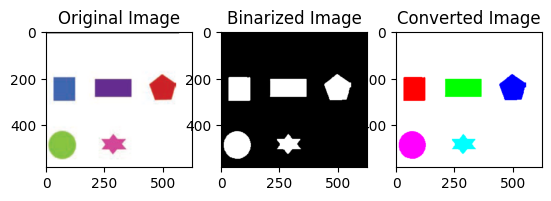

<Figure size 640x480 with 0 Axes>

In [11]:
# Ex1: Convert the objects’ color as follows: the square to red, the rectangle to green, the pentagon to blue, the circle to magenta and the star to cyan

Img = cv2.imread('shapes.png')
# Convert the image from BGR to RGB
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)

GrayImg = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)
GrayImg[0:20,:] = 255 # make black bar on top becomes white

level, bwImg = cv2.threshold(GrayImg, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

[L, obj] = measure.label(bwImg, connectivity=2, return_num=True)


# cmap = np.array([[255, 0, 255], [255, 0, 0], [0, 255, 0], [0, 255, 255], [0, 0, 255]]) / 255
cmap = np.array([[0, 0, 255], [255, 0, 0], [0, 255, 0], [255, 0, 255], [0, 255, 255]]) / 255
# cmap = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255]]) / 255
rgblabel = color.label2rgb(L, colors=cmap, bg_label=0, bg_color='white')

minobjsize = 2000
bg = L > 0
regs = measure.regionprops_table(bg.astype(int), properties=['area'])

# eliminate small objects less than 2,000 pixels
regs = {k: v for k, v in regs.items() if v.size >= minobjsize}

# Display the images
plt.figure(figsize=(12, 6))
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(Img)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(bwImg, cmap='gray')
plt.title('Binarized Image')

plt.subplot(1, 3, 3)
plt.imshow(rgblabel)
plt.title('Converted Image')
plt.show()

plt.tight_layout()
plt.show()

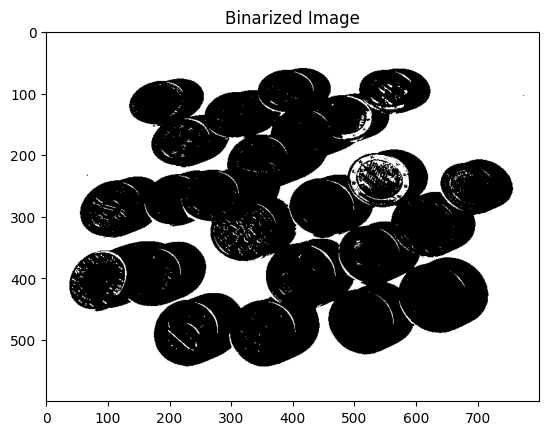

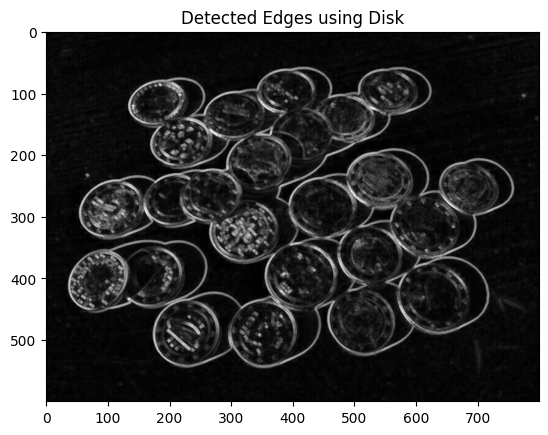

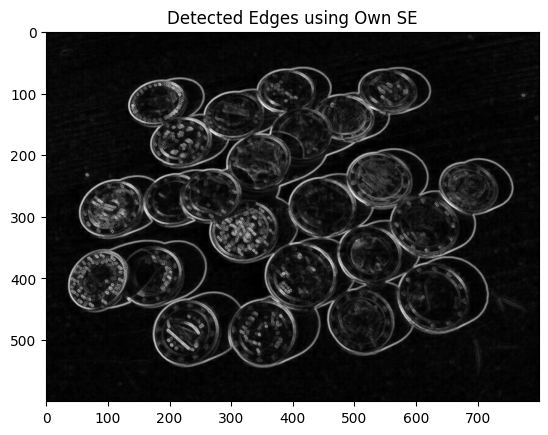

In [12]:
# Ex2. Coins Detection with Defined SE
import numpy as np
import cv2
from skimage import morphology

# load image
Img = cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)

# a. Convert the original image to binary and display the result.
level, bwImg = cv2.threshold(Img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(bwImg, cmap='gray')
plt.title('Binarized Image')
plt.show()

# b. Use erosion and/or dilation to draw the edge of the objects. You can choose any structuring element to apply (i.e., disk)
se = morphology.disk(2)
Img_dilated = morphology.dilation(Img, se)
Img_eroded = morphology.erosion(Img, se)
edge1 = Img_dilated - Img
edge2 = Img - Img_eroded
edge3 = edge1 + edge2
plt.imshow(edge3, cmap='gray')
plt.title('Detected Edges using Disk')
plt.show()

# c. Generate a structuring element as below. Could we count the number of coins using this structuring element?
# | 0 1 1 0 |
# | 1 0 0 1 |
# | 1 0 0 1 |
# | 0 1 1 0 |

se1 = np.array([[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 0]], dtype=np.uint8)
Img_dilated = morphology.dilation(Img, se1)
Img_eroded = morphology.erosion(Img, se1)
edge1 = Img_dilated - Img
edge2 = Img - Img_eroded
edge3 = edge1 + edge2
plt.imshow(edge3, cmap='gray')
plt.title('Detected Edges using Own SE')
plt.show()